# Problem Statement

As a data scientist at a telecom company 'Jio' whose customers
are churning out to its competitors,I have to analyze the data of the
company and find insights and stop your customers from churning out to other telecom companies.

# Customer_churn Dataset:

The details regarding this ‘customer_churn’ dataset are present in the data
dictionary

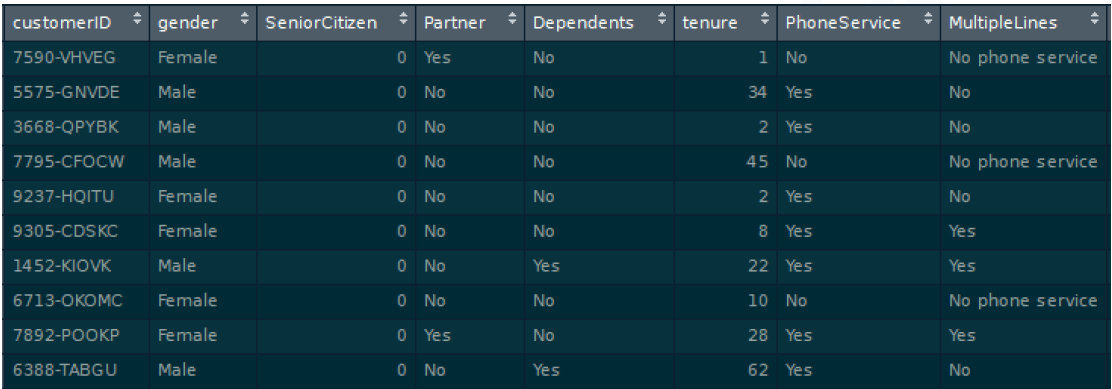

## Domain: Telecom

In [65]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# loading dataset
df=pd.read_csv('Customer-Churn.csv')

In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
df.shape

(7043, 21)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
# changing TotalCharges column datatype from object to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
# checking null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [73]:
# calculating percentage of null values in TotalCharges 
(df['TotalCharges'].isna().sum()/df.shape[0])*100

0.1561834445548772

In [74]:
# since the percentage is very less we can drop the null values
df.dropna(inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [76]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [77]:
# checking duplicates
df.duplicated().sum()

0

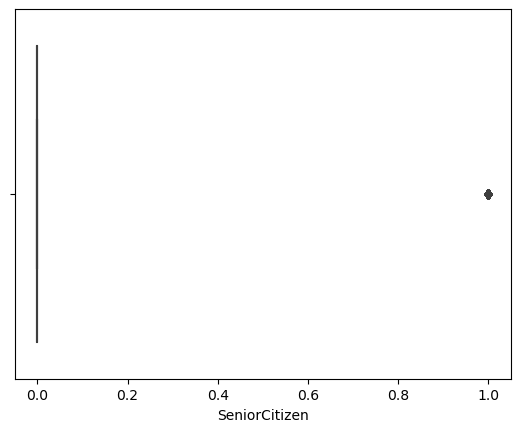

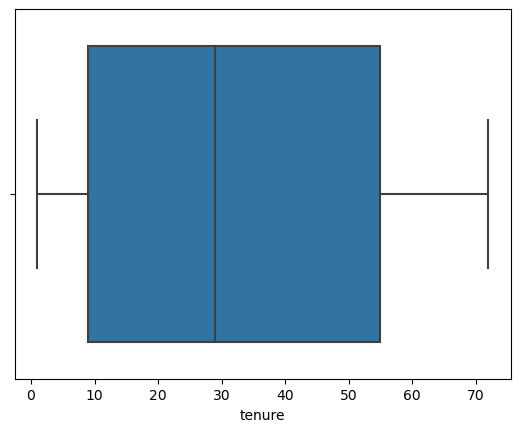

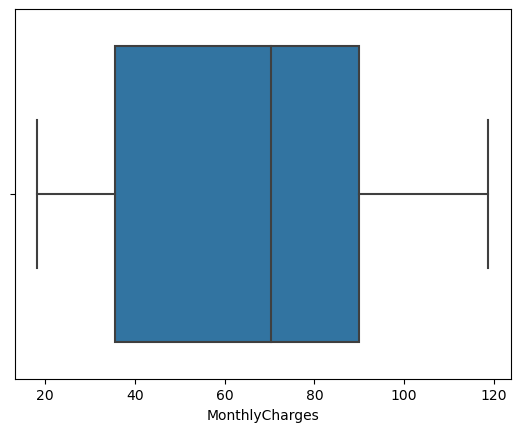

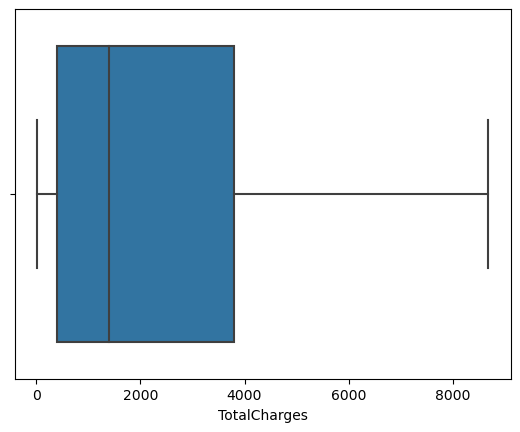

In [78]:
# checking outliers
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(x=df[i],data=df)
        plt.show()

# Tasks to be performed -

## 1. Data Manupulation

Extract the 5th column and store it in ‘customer_5'

In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
customer_5 = df.iloc[:,4]  # using iloc
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object

In [81]:
customer_5=df.loc[:,'Dependents']   # using loc
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object

Extract the 15th column and store it in ‘customer_15’

In [82]:
customer_15=df.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7032, dtype: object

Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

In [83]:
 df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
senior_male_electronic= df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’

In [85]:
customer_total_tenure=df[(df['tenure']>70) | (df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

In [86]:
two_mail_yes=df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333

In [87]:
customer_333=df.sample(n=333,random_state=40)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5414,2722-VOJQL,Male,0,No,No,64,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),105.65,6903.10,Yes
1251,7595-EUIVN,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.80,75.80,Yes
5423,5228-EXCET,Male,0,No,No,13,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.85,1008.70,Yes
6676,5274-XHAKY,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),94.30,3893.60,No
4080,6199-IPCAO,Female,0,Yes,Yes,29,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,692.55,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,5318-IXUZF,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),87.15,183.75,Yes
5850,6927-WTFIV,Male,1,No,No,20,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),71.30,1389.20,Yes
5106,8878-RYUKI,Female,0,No,No,52,Yes,No,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,59.45,3043.70,No
2009,7639-OPLNG,Male,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),79.25,5731.85,No


Get the count of different levels from the ‘Churn’ column

In [88]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

# 2. Data Vizualization

In [89]:
cnt=df['InternetService'].value_counts()
cnt

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [90]:
# above output looks like key value pairs as in dictionary
# so will separate the key and values
# key => categories of Internet Service
# value => count of categories

In [91]:
x=df['InternetService'].value_counts().keys().tolist()
x

['Fiber optic', 'DSL', 'No']

In [92]:
y=df['InternetService'].value_counts().tolist()
y

[3096, 2416, 1520]

Text(0.5, 1.0, 'Distribution of Internet Service')

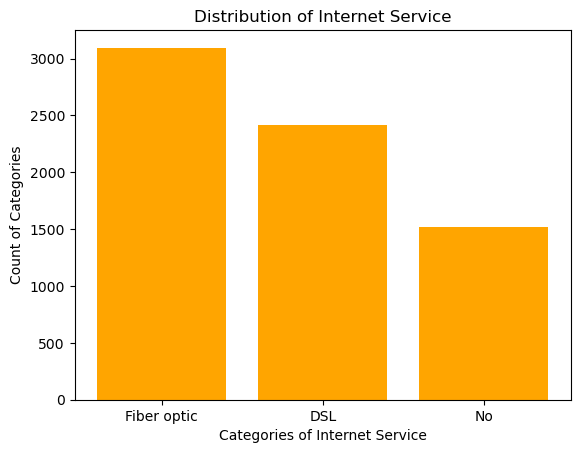

In [93]:
plt.bar(x,y,color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

Text(0.5, 1.0, '')

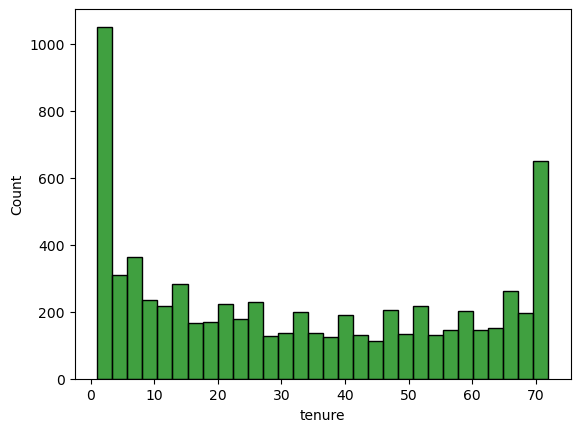

In [94]:
sns.histplot(df['tenure'],bins=30,color='green')
plt.title('')

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Tenure vs Monthly Charges')

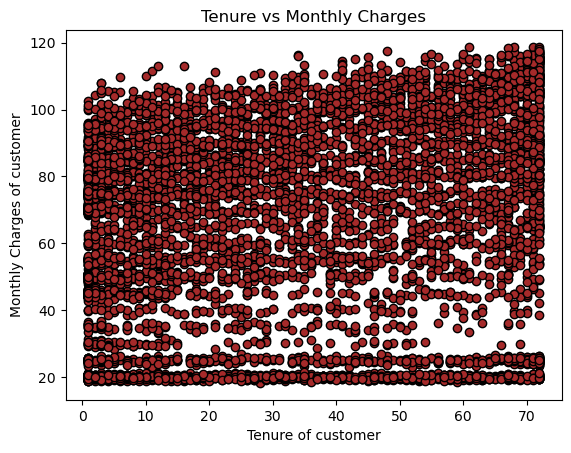

In [96]:
x=df['tenure']
y=df['MonthlyCharges']
plt.scatter(x,y,color='brown',edgecolor='black')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

<Axes: xlabel='Contract', ylabel='tenure'>

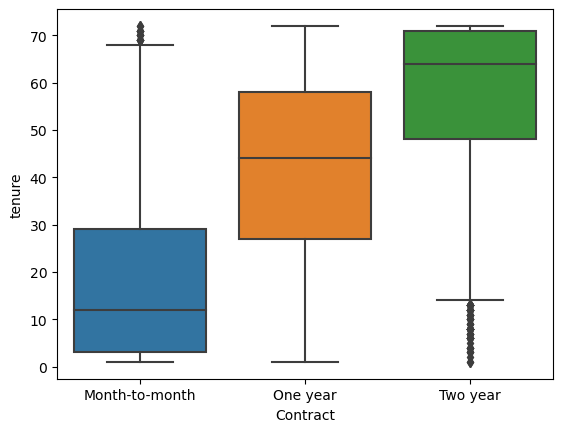

In [97]:

sns.boxplot(x='Contract',y='tenure',data=df)

# Checking Correlation

In [98]:
#single correlation
#multicorrelation--> we include categorical columns also. To do that we have to encode the categorical columns to numerical columns.

## Single correlation

C:\Users\KIIT\AppData\Local\Temp\ipykernel_3924\3170444083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

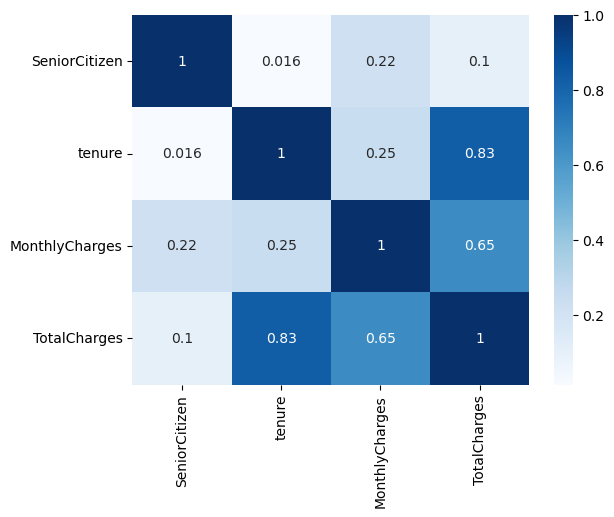

In [99]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [100]:
# we can see high correlation of tenure with TotalCharges, so will drop tenure

In [101]:
df.drop('tenure',inplace=True,axis=1)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_3924\3170444083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

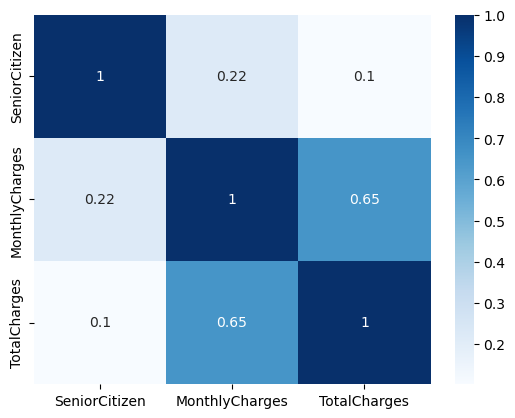

In [102]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

## Multicorrelation

In [103]:
# first encoding categorical features to numerical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [104]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int32  
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


In [106]:
# for predicting whether a customer has churned or not, customer id col is not needed and is irrelevant.
# so we can drop customerID col.

In [107]:
df.drop('customerID',inplace=True,axis=1)

## Checking multicorrelation using variance inflation factor (VIF)

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
# segregating independent & dependent features
X=df.drop('Churn',axis=1) #independent features
Y=df['Churn']

In [110]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [111]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [112]:
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF value
0,gender,1.928012
1,SeniorCitizen,1.362305
2,Partner,2.749816
3,Dependents,1.956119
4,PhoneService,14.683342
5,MultipleLines,2.697814
6,InternetService,4.328137
7,OnlineSecurity,2.231907
8,OnlineBackup,2.441994
9,DeviceProtection,2.627763


In [113]:
# VIF accepeted value is till 5 to 6. 
# If VIF value > 5 or 6 that is not accepted as it means high collinearity. So will drop those columns.
X.drop('MonthlyCharges',axis=1,inplace=True)

In [114]:
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF value
0,gender,1.919674
1,SeniorCitizen,1.341260
2,Partner,2.749816
3,Dependents,1.955831
4,PhoneService,8.200629
5,MultipleLines,2.499564
6,InternetService,3.491818
7,OnlineSecurity,2.228559
8,OnlineBackup,2.441964
9,DeviceProtection,2.617616


In [115]:
X.drop('PhoneService',axis=1,inplace=True)

In [116]:
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF value
0,gender,1.864278
1,SeniorCitizen,1.336778
2,Partner,2.739901
3,Dependents,1.949167
4,MultipleLines,2.492203
5,InternetService,2.529810
6,OnlineSecurity,2.196135
7,OnlineBackup,2.437734
8,DeviceProtection,2.616390
9,TechSupport,2.357595


In [117]:
# now VIF values of all the columns are in acceptable range

In [118]:
# final independent column
X

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1889.50
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1840.75
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1990.50
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,7362.90
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,346.45
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,306.60


# 3. Logistic Regression

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=40)

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
lr=LogisticRegression()

In [124]:
lr.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
y_test_pred_lr=lr.predict(x_test)

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [139]:
ci_lr=confusion_matrix(y_test,y_test_pred_lr)
ci_lr

array([[1346,  211],
       [ 287,  266]], dtype=int64)

In [130]:
accuracy_score_lr=accuracy_score(y_test,y_test_pred_lr)*100
accuracy_score_lr

76.39810426540285

# 4. Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dt=DecisionTreeClassifier()

In [133]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [134]:
y_test_pred_dt=dt.predict(x_test)

In [141]:
ci_dt=confusion_matrix(y_test,y_test_pred_dt)
ci_dt

array([[1248,  309],
       [ 280,  273]], dtype=int64)

In [142]:
accuracy_score_dt=accuracy_score(y_test,y_test_pred_dt)*100
accuracy_score_dt

72.08530805687204

# 5. Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf=RandomForestClassifier()

In [145]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [146]:
y_test_pred_rf=rf.predict(x_test)

In [148]:
ci_rf=confusion_matrix(y_test,y_test_pred_rf)
ci_rf

array([[1369,  188],
       [ 292,  261]], dtype=int64)

In [150]:
accuracy_score_rf=accuracy_score(y_test,y_test_pred_rf)*100
accuracy_score_rf

77.25118483412322

In [154]:
Algo=['Logistic Regression','Decision Tree','Random_Forest']
accuracy=[accuracy_score_lr,accuracy_score_dt,accuracy_score_rf]

Text(0.5, 1.0, 'Comparsion of Accuracy of different Models')

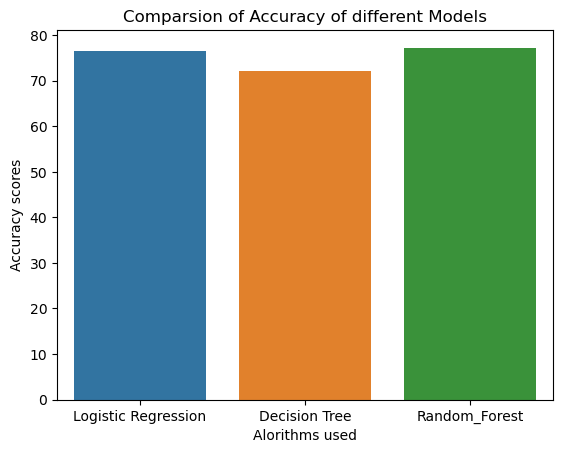

In [156]:
sns.barplot(x=Algo,y=accuracy)
plt.xlabel('Alorithms used')
plt.ylabel('Accuracy scores')
plt.title('Comparsion of Accuracy of different Models')

## We can see Random Forest has highest accuracy and hence is the best fit for our dataset